In [18]:
%matplotlib inline

In [19]:
import mcaa
import random as rng
import matplotlib.pyplot as plt
import numpy as np

In [20]:
plt.rcParams["figure.figsize"] = (16, 5)

In [21]:
# CONSTANTS
BETA = 0.9
ALPHA = 2.0
N = 100
M = int(ALPHA * N) 
T = 1000 * N
MEASURE_STEP = 1
RUN_COUNT = 64
THREAD_COUNT = 5

In [22]:
# SEEDS
weightsSeed = rng.randint(0,2**32-1)
patternsSeed = rng.randint(0,2**32-1)

samplerSeeds = [rng.randint(0,2**32-1) for i in range(RUN_COUNT)]
runnerSeeds = [rng.randint(0,2**32-1) for i in range(RUN_COUNT)]

In [23]:
# INPUT VARIABLES
weights = mcaa.buildRandomWeights(N, weightsSeed)
patterns = mcaa.buildRandomPatterns(N, M, patternsSeed)
classes = mcaa.buildClasses(weights, patterns)

In [24]:
# SAMPLERS & RUNNERS
samplers = [mcaa.sampler(N, samplerSeeds[i]) for i in range(RUN_COUNT)]
runners = [mcaa.MCMCRunner(T, MEASURE_STEP, BETA, samplers[i], weights, patterns, classes, runnerSeeds[i]) \
           for i in range(RUN_COUNT)]
multiRunner = mcaa.multiMCMCRunner(THREAD_COUNT, [runner.getPointer() for runner in runners]) 

In [25]:
# RUN
multiRunner.runAll()

In [26]:
# OUTPUTS
allEMeasures = multiRunner.getEMeasures()
allOverlapMeasures = multiRunner.getOverlapMeasures()

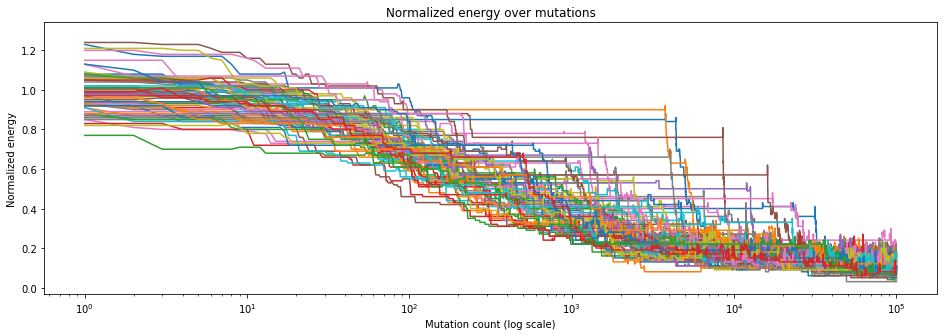

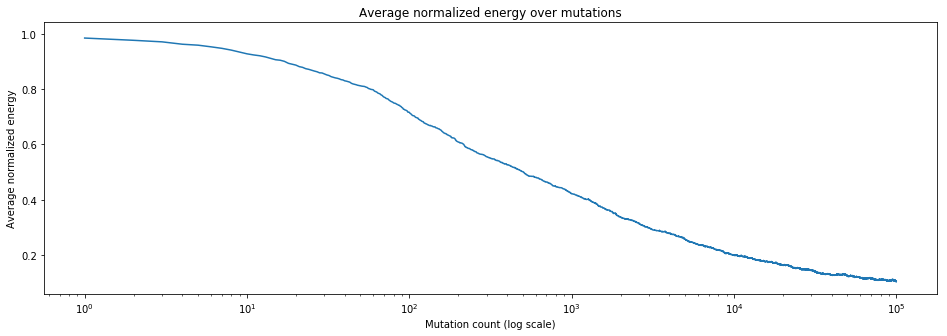

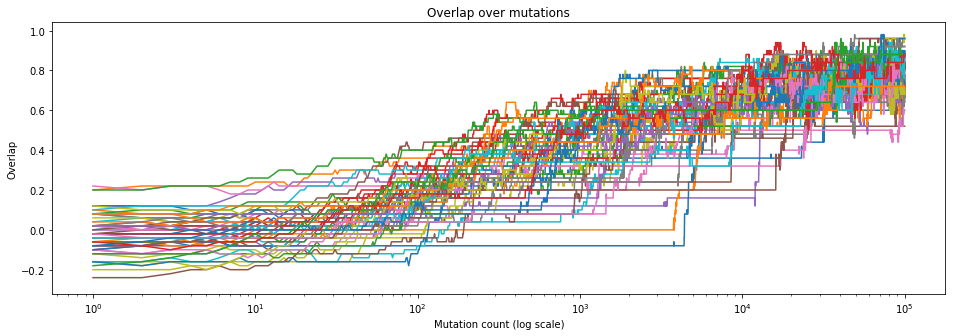

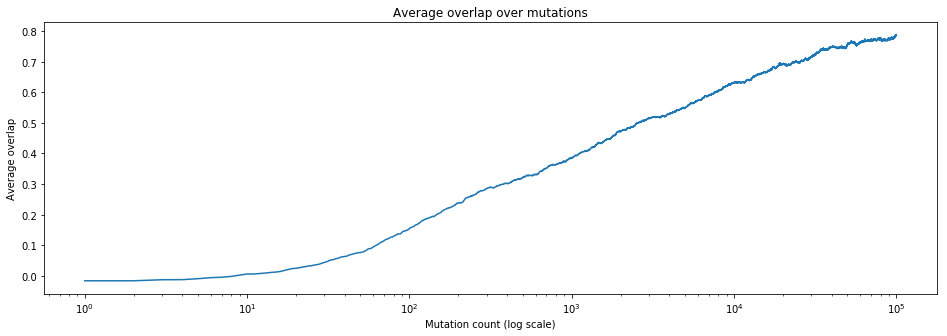

In [27]:
# PLOT
for i in range(RUN_COUNT):
    EMeasures = allEMeasures[:, i]
    plt.plot(EMeasures / M)
plt.xscale('log')
plt.title('Normalized energy over mutations')
plt.xlabel('Mutation count (log scale)')
plt.ylabel('Normalized energy')
plt.show()

EMeasuresMean = np.mean(allEMeasures, axis=1)
plt.plot(EMeasuresMean / M)
plt.xscale('log')
plt.title('Average normalized energy over mutations')
plt.xlabel('Mutation count (log scale)')
plt.ylabel('Average normalized energy')
plt.show()

for i in range(RUN_COUNT):
    overlapMeasures = allOverlapMeasures[:, i]
    plt.plot(overlapMeasures)
plt.xscale('log')
plt.title('Overlap over mutations')
plt.xlabel('Mutation count (log scale)')
plt.ylabel('Overlap')
plt.show()


averageOverlapMeasures = np.mean(allOverlapMeasures, axis=1)
plt.plot(averageOverlapMeasures)
plt.xscale('log')
plt.title('Average overlap over mutations')
plt.xlabel('Mutation count (log scale)')
plt.ylabel('Average overlap')
plt.show()